# CME 193 - Lecture 3 - SciPy

So far we've seen:
* Basic Python syntax
* Basic numeric arrays using NumPy

Today we'll see:
* Basic Python Classes
* Linear Algebra in SciPy

# Homework

Homework 1 is now posted.  It will be due in 1 week.  After today's class you'll have everything you need to complete it:
* Knowledge of Python Classes
* Know how to do some basic linear algebra in SciPy
* You've seen power method (last Lecture 2)

# Classes/Object Oriented Programming

The basic goal of classes is to give you a way to abstract away details when you program.  For instance, NumPy gave you an `array` class, which allowed you to store and pass around a large amount of information using a single variable, and perform a variety of operations on that variable (methods) without needing to implement them yourself.

Many programming languages have the ability to accomplish similar levels of abstraction, although not all use the same terminology.

Classes you've already seen:
* Integers
* Floats
* Lists
* NumPy Arrays
* PyPlot - Figures, Axes, etc.

When you want to make your own class, you need to write a class definition.  Then you can create objects using that class definition.

In [5]:
# -- minimal example...
# define class:
class Leaf(object): 
    pass # there is no information in this class
# instantiate object
leaf = Leaf()

print(leaf)
print(type(leaf))
print(isinstance(1.0, Leaf)) # checks class membership

<class '__main__.Leaf'>
False


To put information in your class, add an initialization object

In [7]:
import numpy as np
a = np.array([1,2,3])
a

array([1, 2, 3])

In [6]:
# example
class Leaf(object):
    def __init__(self, color1):
        self.color = color1 # private attribute 
    
redleaf = Leaf('red')
blueleaf = Leaf('blue')

print(redleaf.color) # access the attribute using .

red


## Class Hierarchy

A natural thing to think about as it relates to classes is the notion of *hierarchy*. We imbue the notion of hierarchy through something called *inheritance*.

An example:

* Animal
  * Bird
    * Hawk 
    * Seagull
    * ...
  * Dog
    * Shiba Inu
    * Golden Retriever
    * ...
  * ...

In [8]:
# lets define an *abstract* base class.

class Animal(object):
    def __init__(self, n_legs, color):
        self.n_legs = n_legs 
        self.color = color
        
    def make_noise(self): 
        print('noise')

In [9]:
# lets define some classes that will inherit
class Dog(Animal): # note we use (Animal), not (object)
    def __init__(self, color, name):
        Animal.__init__(self, 4, color) # 4 legs
        self.name = name 
        
    def make_noise(self):
        print(self.name + ': ' + 'woof')

In [10]:
class Bird(Animal):
    def __init__(self, color, name, has_wings=True, can_fly=True):
        Animal.__init__(self, 2, color) # 2 legs
        self.name = name
        self.has_wings = has_wings
        self.can_fly = can_fly
    
    def make_noise(self):
        print(self.name + ': chirp!')

In [17]:
# noise
brutus = Dog('black', 'Brutus')
brutus.make_noise()
brutus.n_legs = 3
brutus.n_legs

Brutus: woof


3

In [14]:
shelly = Bird('white', 'Shelly')
shelly.make_noise()
shelly.can_fly

Shelly: chirp!


True

There are some standard methods that one may want to overload / implement:

* `__init__`: Constructor
* `__repr__`: Represent the object (machine) 
* `__str__`: Represent the object (human) and gets called when you `print`
    
these `__method__` looking functions are built into Python!

## Example: Rational Numbers

Here we'l make a class that holds rational numbers (fractions).  That is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers

In [26]:
# from numpy import gcd
from math import gcd

class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g # integer division
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)


In [27]:
a = Rational(6, 4)
b = Rational(3, 2)

print(type(a))
print("a = ",a)
print("b = ",b)
print("float(a) = ", float(a))

<class '__main__.Rational'>
a =  3 / 2
b =  3 / 2
float(a) =  1.5


You can do cool things like overload math operators.  This lets you write code that looks like you would write math.  Recall

$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [23]:
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other): # that's two underscores "_" on each side
        '''
        this is R + X, where R is rational and X is another number
        '''
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if its an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
        '''
        this is X + R, where R is rational and X is not rational
        '''
        return self + other # addition commutes!
    

In [24]:
r = Rational(3)
print(r)

3 / 1


In [25]:
r = Rational(3, 2)
print('Integer adding:')
print('right add')
print(r + 4)
print(float(r + 4))
print('left add')
print(4 + r)
print(float(4 + r))

Integer adding:
right add
11 / 2
5.5
left add
11 / 2
5.5


# Exercise 1

### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.3/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__` (and `__rmul__`)
* `/` - use `__truediv__` (and `__rtruediv__`)
* `-` - use `__sub__` (and `__rsub__`)

You only need to define these operations between two `Rational` types - use an `isinstance(other, Rational)` block.

Note that the `__r<op>__` methods only need to be overloaded if you want to interact with another class.

Make a few examples to convince yourself that this works.

### Create another class

Implement a class to do arithmetic in the ring $\mathbb{Z} \mod N$ for some $N > 1$:
* $a + b = (a + b) \mod N$
* $a * b = (a * b) \mod N$

You can either:
* Choose a value for $N$ and hard-code it into your class
* Specify $N$ for each object you create.
    * make sure two objects are in the same ring when you do arithmetic!

In [3]:
from math import gcd
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals
    def __add__(self, other): # that's two underscores "_" on each side
        '''
        this is R + X, where R is rational and X is another number
        '''
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if its an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other):
        '''
        this is X + R, where R is rational and X is not rational
        '''
        return self + other # addition commutes!
    
    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q - other.p * self.q, self.q * other.q)
    
    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.p, self.q * other.q)
        
    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q, self.q * other.p)

In [7]:
a = Rational(3,2)
b = Rational(3,2)
print(a + b)
print(a - b)
print(a * b)
print(a / b)

3 / 1
0 / 1
9 / 4
1 / 1


# SciPy

SciPy is a library with a variety of modules useful for scientific computing.

* Linear Algebra (Dense, Sparse)
* Optimization
* Special Functions
* Integration
* Image Processing
* Statistics
* ...

See the [online reference](https://docs.scipy.org/doc/scipy/reference/) for additional information.

The library is built on NumPy arrays for dense vectors/matrices.

Today, we'll cover some linear algebra capabilities.  Thursday, we'll see the optimization module.

# SciPy Dense Linear Algebra

Why have a SciPy linear algebra module, when NumPy already has this?

* SciPy always uses BLAS/LAPACK under the hood (usually faster)
* SciPy adds to the number of functions available.

You can find an introductory reference [here](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html).  The syntax is the same as numpy for functions that are in both.

In [28]:
import scipy.linalg as sla
import numpy.linalg as nla

In [29]:
# example of SVD
A = np.random.normal(0, 1, (2,3))
U, S, V = sla.svd(A) # scipy
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)
U, S, V = nla.svd(A) # numpy
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[-0.69439073 -0.70823003  0.01997376]
 [-0.0639474   0.75584747  0.68582013]]
U = 
 [[-0.68396513  0.72951471]
 [ 0.72951471  0.68396513]]
S = 
 [1.22194874 0.73263389]
V = 
 [[ 3.50496271e-01  8.47667711e-01  3.98260989e-01]
 [-7.51133745e-01  4.21882692e-04  6.60149921e-01]
 [ 5.59419753e-01 -5.30527354e-01  6.36859691e-01]]
U = 
 [[-0.68396513  0.72951471]
 [ 0.72951471  0.68396513]]
S = 
 [1.22194874 0.73263389]
V = 
 [[ 3.50496271e-01  8.47667711e-01  3.98260989e-01]
 [-7.51133745e-01  4.21882692e-04  6.60149921e-01]
 [ 5.59419753e-01 -5.30527354e-01  6.36859691e-01]]


# Sparse Linear Algebra

We've seen a bit of dense linear algebra in both NumPy and SciPy.  If you want to do sparse linear algebra, SciPy's `sparse` module provides standard sparse matrix formats, and functionality to solve linear systems, find eigenvalues, etc.

[SciPy's Sparse Matrix Docs](https://docs.scipy.org/doc/scipy/reference/sparse.html)

[SciPy's Sparse Linear Algebra Docs](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg)

SciPy supports a variety of sparse matrix types:
* CSC (compressed sparse column)
* CSR (compressed sparse row)
* COO (coordinate)
* LIL (linked lists)
* ... (specialized matrix types)

[SciPy's Sparse Matrix Classes](https://docs.scipy.org/doc/scipy/reference/sparse.html#sparse-matrix-classes)

In [8]:
import numpy as np
import scipy.sparse as sparse

## Example: A Diffusion Operator

suppose we want to construct a matrix representation of the laplacian
$$ \Delta = \frac{\partial^2}{\partial_x^2}$$
We'll stick to one dimension for simplicity, and use a simple finite difference scheme with spacing $h$
$$ (\Delta u)_i = \frac{1}{h^2}(-2 u_i + u_{i+1} + u_{i-1})$$
We'll use the matrix `L` to hold our Laplacian
```python
(L * u)[i] = (u[i+1] + u[i-1] - 2*u[i]) / h^2
```
The matrix `L` looks like
$$\frac{1}{h^2}\begin{bmatrix}
\ddots &1 \\
1 &-2 & 1\\
& 1 & -2 & 1\\
& & 1&\ddots
\end{bmatrix}$$
Note that I haven't said anything about boundary conditions...

We'll now construct this matrix using `scipy.sparse.spdiags` which allows us to construct a sparse matrix with given diagonals - [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spdiags.html#scipy.sparse.spdiags)

In [9]:
n = 100
h = 1.0/n
# construct diagonal
diag = -2*np.ones(n)
diag[0] = -1.
diag[-1] = -1.
diag /= (h**2)
# construct off-diagonal
odiag = np.ones(n) / (h**2)
data = np.array([odiag, diag, odiag]) # entries
diags = np.array([-1, 0, 1]) # left of diagonal, diagonal, right of diagonal
L = sparse.spdiags(data, diags, n, n)
L

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 298 stored elements (3 diagonals) in DIAgonal format>

In [10]:
L.toarray()

array([[-10000.,  10000.,      0., ...,      0.,      0.,      0.],
       [ 10000., -20000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -20000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -20000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -20000.,  10000.],
       [     0.,      0.,      0., ...,      0.,  10000., -10000.]])

In [11]:
u = np.random.normal(0, 1, n)

In [12]:
import matplotlib.pyplot as plt

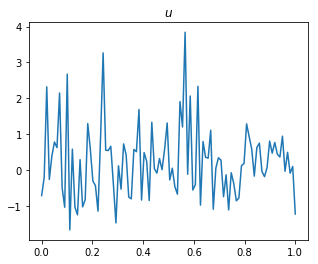

In [13]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), u)
ax.set_title(r"$u$")
plt.show()

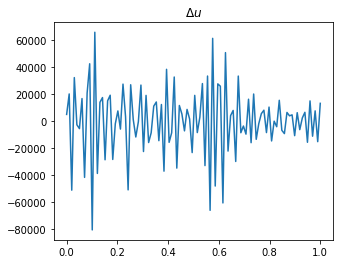

In [14]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), L.dot(u))
ax.set_title(r"$\Delta u$")
plt.show()

Now we'll run the heat equation for a few time steps
$$\frac{\partial u}{\partial t} - \Delta_x u = 0$$
We'll take time steps of length $O(h^2)$.

In [15]:
u_smoothed = u.copy()

In [16]:
for i in range(1000):
    ut = L.dot(u_smoothed) # matrix vector multiplication
    u_smoothed += (ut * (h**2)/4)

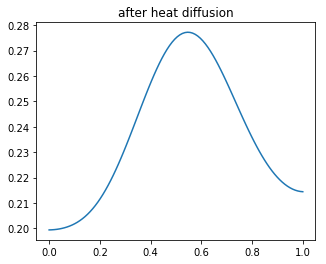

In [17]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), u_smoothed)
ax.set_title(r"after heat diffusion")
plt.show()

## Solving The Poisson Equation

Now, suppose we want to solve the Poisson equation
$$ - \Delta u = f $$
Since $-\Delta$ is symmetric positive, definite, we can use the conjugate gradient (`cg`) algorithm to solve the system.  Alternatively, we can use `minres`.

You can see available iterative methods [here](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems)

In [18]:
def u_gen(x):
    return 0.25-np.square(x - 0.5)
    
u_true = u_gen(np.linspace(0,1,n))

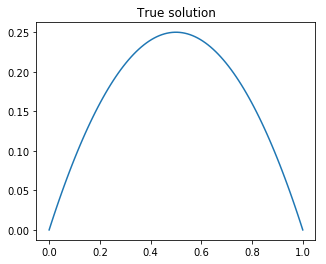

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), u_true)
ax.set_title(r"True solution")
plt.show()

In [20]:
import scipy.sparse.linalg

In [21]:
f = -L.dot(u_true)

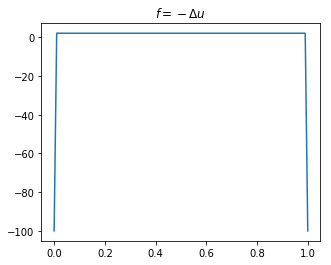

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), f)
ax.set_title(r"$f = -\Delta u$")
plt.show()

In [23]:
u_minres, info = sparse.linalg.minres(-L, f)
u_cg, info = sparse.linalg.cg(-L, f)

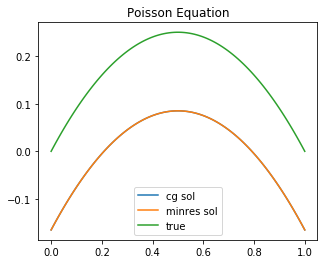

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

ax.plot(np.linspace(0,1,n), u_cg, label="cg sol")
ax.plot(np.linspace(0,1,n), u_minres, label="minres sol")
ax.plot(np.linspace(0,1,n), u_true, label="true")
ax.legend()
ax.set_title(r"Poisson Equation")
plt.show()

Why do the plots disagree?

Note that a constant vector is in the nullspace of $-\Delta$, so without specifying boundary conditions, both solutions are correct.

# Exercise 2

Eigenvectors (eigenfunctions) of the Laplacian $\Delta$ tell us about the vibrational modes of an object.  So far we've constructed a discrete approxim Laplacian on a unit-length "string"

1. Use [`eigsh`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html#scipy.sparse.linalg.eigsh) to compute the smallest (by magnitude of eigenvalue) 4 eigenpairs of $\Delta$.  Plot the eigenvectors in a single plot.
    1. Hint: use the keyword `which='SM'` to get smallest magnitude eigenvalues
2.  Construct a finite difference laplacian on the unit square (100 grid points in each dimension), and compute the smallest several eigenpairs
    1. You can construct the matrix explicitly, or use [`kron`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.kron.html#scipy.sparse.kron)
    2. Hint: if you use `kron`, $L_2 = L_1\otimes I + I \otimes L_1$, where $L_2$ is the laplacian on the square, and $L_1$ is the laplacian on the interval
    3. visualize the eigenvectors as 2-D images
    4. Hint: use `numpy.reshape` and `plt.imshow`
3. In parts 1 and/or 2 What do the eigenvectors with largest eigenvalue look like? (Look at documentation for the `which` keyword again)

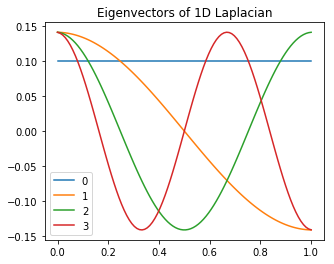

In [31]:
# part 1
import scipy.sparse.linalg
# compute 4 smallest eigenpairs
lam, v = sparse.linalg.eigsh(L, 4, which='SM')

fig, ax = plt.subplots(1, 1, figsize=(5,4))

for i in range(4):
    ax.plot(np.linspace(0,1,n), v[:,3-i], label=i)
    
ax.legend()
ax.set_title(r"Eigenvectors of 1D Laplacian")
plt.show()

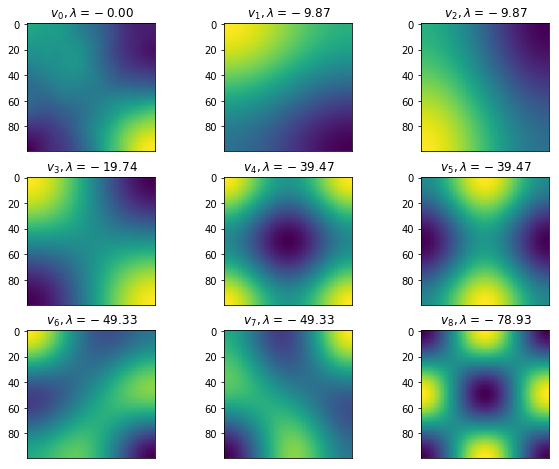

In [54]:
# part 2
I = sparse.eye(n)
# L2 = sparse.kron(L, I) + sparse.kron(I, L)
L2 = sparse.kronsum(L, L)

# compute 9 smallest eigenpairs
lam, v = sparse.linalg.eigsh(L2, 9, which='SM')

# create a k x k grid of plots
fig, ax = plt.subplots(3, 3, figsize=(10,8))

k = 0
for i in range(3):
    for j in range(3):
        eigfun = v[:,8-k].reshape(n,n)
        ax[i,j].imshow(eigfun)
        ax[i,j].set_title(" $v_{%d}, \lambda = %.2f$" % (k, lam[8-k]))
        ax[i,j].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        k += 1

# remove tick parameters: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.show()